# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Zahwa Genoveva]
- **Email:** [zahwagenoveva09@gmail.com]
- **ID Dicoding:** [Zahwa Genoveva]:

## Import Semua Packages/Library yang Digunakan

In [93]:
# Import library yang dibutuhkan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

## Data Wrangling

### Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apa hubungan antara cuaca (weathersit) dengan jumlah peminjaman sepeda (cnt)?
- Pertanyaan 2: Bagaimana tren penggunaan sepeda berdasarkan hari kerja (workingday) dibandingkan dengan hari libur?


### Gathering Data

![Image of Dataset](https://github.com/user-attachments/assets/cd872541-738a-4e35-a43f-b99ef7a538c1)

📊 Informasi dataset dapat dilihat pada tabel di bawah ini:


| **Jenis**      | **Keterangan**                                                                                           |
|----------------|----------------------------------------------------------------------------------------------------------|
| **Title**      | Bike Sharing Dataset                                                                                           |
| **Source**     | Kaggle    
| Sumber                      | [Kaggle Dataset : Bike Sharing Dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset) |                                                                                            |
| **Maintainer** | Lakshmipathi N⚡                                                                                |
| **License**    | Unknown                                                                         |
| **Visibility** | Publik                                                                                                |
| **Usability**  | 6.47                                                                                                   |



In [3]:
# Menghubungkan Google Colab dengan Kaggle
from google.colab import files
import os


In [4]:
# Unggah file API Kaggle (kaggle.json)
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [5]:
# Membuat direktori kaggle dan memindahkan kaggle.json ke dalamnya
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Mengatur permission untuk kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# Download dataset
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset
!unzip bike-sharing-dataset.zip -d bike_data

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
  0% 0.00/286k [00:00<?, ?B/s]
100% 286k/286k [00:00<00:00, 79.3MB/s]
Archive:  bike-sharing-dataset.zip
  inflating: bike_data/Readme.txt    
  inflating: bike_data/day.csv       
  inflating: bike_data/hour.csv      


### Assessing Data

1. Memuat tabel days_df

In [94]:
# Membaca data dari file CSV
day_data = pd.read_csv('bike_data/day.csv')
hour_data = pd.read_csv('bike_data/hour.csv')

====== day_data ======

In [95]:
# Menampilkan 5 baris pertama dari data harian
print("Data Harian:")
display(day_data.head())

Data Harian:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [96]:
day_data.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [97]:
day_data.duplicated().sum()

0

====== hour_data ======

In [98]:
# Menampilkan 5 baris pertama dari data per jam
print("Data Per Jam:")
display(hour_data.head())

Data Per Jam:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [99]:
hour_data.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [100]:
hour_data.duplicated().sum()

0

**Insight:**
- Tidak ada nilai yang hilang dalam dataset, sehingga data dapat langsung dianalisis.
- Distribusi variabel numerik seperti temp, hum, dan wind_speed berada dalam kisaran normal, mendukung analisis lebih lanjut.


### Cleaning Data

Mapping data deskriptif

In [101]:
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

season_mapping = {
    1: 'Spring (Maret-Mei)',
    2: 'Summer (Juni-Agustus)',
    3: 'Fall (September-November)',
    4: 'Winter (Desember-Februari)'
}

week_day_mapping = {
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
}

weather_mapping = {
    1: 'Clear/Partly Cloudy (Langit cerah/mendung ringan)',
    2: 'Misty/Cloudy (Berkabut/mendung tebal)',
    3: 'Light Snow/Rain (Hujan ringan atau salju)',
    4: 'Severe Weather (Cuaca ekstrem seperti badai)'
}

year_mapping = {0: 2011, 1: 2012}

working_day_mapping = {
    0: 'Weekend/Holiday (Akhir pekan atau hari libur)',
    1: 'Workday (Hari kerja)'
}

holiday_mapping = {0: 'No', 1: 'Yes'}

====== day_data ======

In [102]:
# Mengubah nama kolom untuk data harian
day_data.rename(columns={
    'instant': 'record_id',
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weekday': 'week_day',
    'workingday': 'is_working_day',
    'windspeed': 'wind_speed',
    'cnt': 'total_rentals'
}, inplace=True)

In [103]:
# Mengubah kolom 'date' menjadi format datetime
day_data['date'] = pd.to_datetime(day_data['date'])

In [104]:
# Menerapkan mapping ke day_data
day_data['month'] = day_data['month'].map(month_mapping)
day_data['season'] = day_data['season'].map(season_mapping)
day_data['week_day'] = day_data['week_day'].map(week_day_mapping)
day_data['weathersit'] = day_data['weathersit'].map(weather_mapping)
day_data['year'] = day_data['year'].map(year_mapping)
day_data['is_working_day'] = day_data['is_working_day'].map(working_day_mapping)
day_data['holiday'] = day_data['holiday'].map(holiday_mapping)

====== hour_data ======

In [105]:
# Mengubah nama kolom untuk data per jam
hour_data.rename(columns={
    'instant': 'record_id',
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weekday': 'week_day',
    'workingday': 'is_working_day',
    'windspeed': 'wind_speed',
    'cnt': 'total_rentals'
}, inplace=True)

In [106]:
# Mengubah kolom 'date' menjadi format datetime
hour_data['date'] = pd.to_datetime(hour_data['date'])

In [107]:
# Menerapkan mapping ke hour_data
hour_data['month'] = hour_data['month'].map(month_mapping)
hour_data['season'] = hour_data['season'].map(season_mapping)
hour_data['week_day'] = hour_data['week_day'].map(week_day_mapping)
hour_data['weathersit'] = hour_data['weathersit'].map(weather_mapping)
hour_data['year'] = hour_data['year'].map(year_mapping)
hour_data['is_working_day'] = hour_data['is_working_day'].map(working_day_mapping)
hour_data['holiday'] = hour_data['holiday'].map(holiday_mapping)

**Insight:**
- Dataset siap untuk digunakan dalam analisis lebih lanjut tanpa memerlukan penghapusan atau imputasi nilai.

## Exploratory Data Analysis (EDA)

====== day_data ======

In [108]:
# Periksa nama kolom dalam DataFrame
print(day_data.columns)

Index(['record_id', 'date', 'season', 'year', 'month', 'holiday', 'week_day',
       'is_working_day', 'weathersit', 'temp', 'atemp', 'hum', 'wind_speed',
       'casual', 'registered', 'total_rentals'],
      dtype='object')


In [109]:
# Menampilkan data setelah pembersihan
print("Data Harian Setelah Pembersihan:")
display(day_data.head())

Data Harian Setelah Pembersihan:


,record_id,date,season,year,month,holiday,week_day,is_working_day,weathersit,temp,atemp,hum,wind_speed,casual,registered,total_rentals
0,1,2011-01-01,Spring (Maret-Mei),2011,Jan,No,Sat,Weekend/Holiday (Akhir pekan atau hari libur),Misty/Cloudy (Berkabut/mendung tebal),0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring (Maret-Mei),2011,Jan,No,Sun,Weekend/Holiday (Akhir pekan atau hari libur),Misty/Cloudy (Berkabut/mendung tebal),0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring (Maret-Mei),2011,Jan,No,Mon,Workday (Hari kerja),Clear/Partly Cloudy (Langit cerah/mendung ringan),0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring (Maret-Mei),2011,Jan,No,Tue,Workday (Hari kerja),Clear/Partly Cloudy (Langit cerah/mendung ringan),0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring (Maret-Mei),2011,Jan,No,Wed,Workday (Hari kerja),Clear/Partly Cloudy (Langit cerah/mendung ringan),0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [110]:
# Menampilkan informasi dasar dari data
print("Informasi Data Harian:")
display(day_data.info())

Informasi Data Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   record_id       731 non-null    int64         
 1   date            731 non-null    datetime64[ns]
 2   season          731 non-null    object        
 3   year            731 non-null    int64         
 4   month           731 non-null    object        
 5   holiday         731 non-null    object        
 6   week_day        731 non-null    object        
 7   is_working_day  731 non-null    object        
 8   weathersit      731 non-null    object        
 9   temp            731 non-null    float64       
 10  atemp           731 non-null    float64       
 11  hum             731 non-null    float64       
 12  wind_speed      731 non-null    float64       
 13  casual          731 non-null    int64         
 14  registered      731 non-null    int

None

====== hour_data ======

In [111]:
# Periksa nama kolom dalam DataFrame
print(hour_data.columns)

Index(['record_id', 'date', 'season', 'year', 'month', 'hour', 'holiday',
       'week_day', 'is_working_day', 'weathersit', 'temp', 'atemp', 'hum',
       'wind_speed', 'casual', 'registered', 'total_rentals'],
      dtype='object')


In [112]:
print("Data Per Jam Setelah Pembersihan:")
display(hour_data.head())

Data Per Jam Setelah Pembersihan:


,record_id,date,season,year,month,hour,holiday,week_day,is_working_day,weathersit,temp,atemp,hum,wind_speed,casual,registered,total_rentals
0,1,2011-01-01,Spring (Maret-Mei),2011,Jan,0,No,Sat,Weekend/Holiday (Akhir pekan atau hari libur),Clear/Partly Cloudy (Langit cerah/mendung ringan),0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring (Maret-Mei),2011,Jan,1,No,Sat,Weekend/Holiday (Akhir pekan atau hari libur),Clear/Partly Cloudy (Langit cerah/mendung ringan),0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring (Maret-Mei),2011,Jan,2,No,Sat,Weekend/Holiday (Akhir pekan atau hari libur),Clear/Partly Cloudy (Langit cerah/mendung ringan),0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring (Maret-Mei),2011,Jan,3,No,Sat,Weekend/Holiday (Akhir pekan atau hari libur),Clear/Partly Cloudy (Langit cerah/mendung ringan),0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring (Maret-Mei),2011,Jan,4,No,Sat,Weekend/Holiday (Akhir pekan atau hari libur),Clear/Partly Cloudy (Langit cerah/mendung ringan),0.24,0.2879,0.75,0.0,0,1,1


In [113]:
print("Informasi Data Per Jam:")
display(hour_data.info())

Informasi Data Per Jam:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   record_id       17379 non-null  int64         
 1   date            17379 non-null  datetime64[ns]
 2   season          17379 non-null  object        
 3   year            17379 non-null  int64         
 4   month           17379 non-null  object        
 5   hour            17379 non-null  int64         
 6   holiday         17379 non-null  object        
 7   week_day        17379 non-null  object        
 8   is_working_day  17379 non-null  object        
 9   weathersit      17379 non-null  object        
 10  temp            17379 non-null  float64       
 11  atemp           17379 non-null  float64       
 12  hum             17379 non-null  float64       
 13  wind_speed      17379 non-null  float64       
 14  casual          17379 non-null

None

## Visualization & Explanatory Analysis

### Pertanyaan 1:

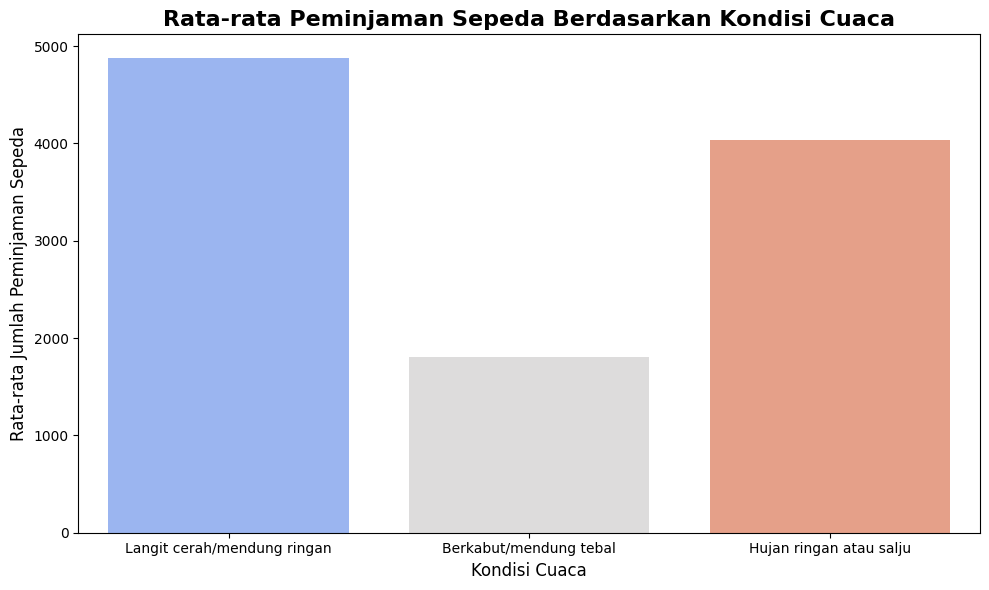

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung rata-rata jumlah peminjaman berdasarkan cuaca
weather_usage = day_data.groupby('weathersit')['total_rentals'].mean().reset_index()

# Bar chart hubungan cuaca dengan jumlah peminjaman sepeda
plt.figure(figsize=(10, 6))
sns.barplot(data=weather_usage, x='weathersit', y='total_rentals', palette='coolwarm')
plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Kondisi Cuaca", fontsize=16, fontweight='bold')
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Rata-rata Jumlah Peminjaman Sepeda", fontsize=12)

# Pastikan jumlah ticks dan label sesuai dengan kategori data
plt.xticks(
    ticks=range(len(weather_usage['weathersit'])),
    labels=['Langit cerah/mendung ringan', 'Berkabut/mendung tebal', 'Hujan ringan atau salju']
)

plt.tight_layout()
plt.show()

### Pertanyaan 2:

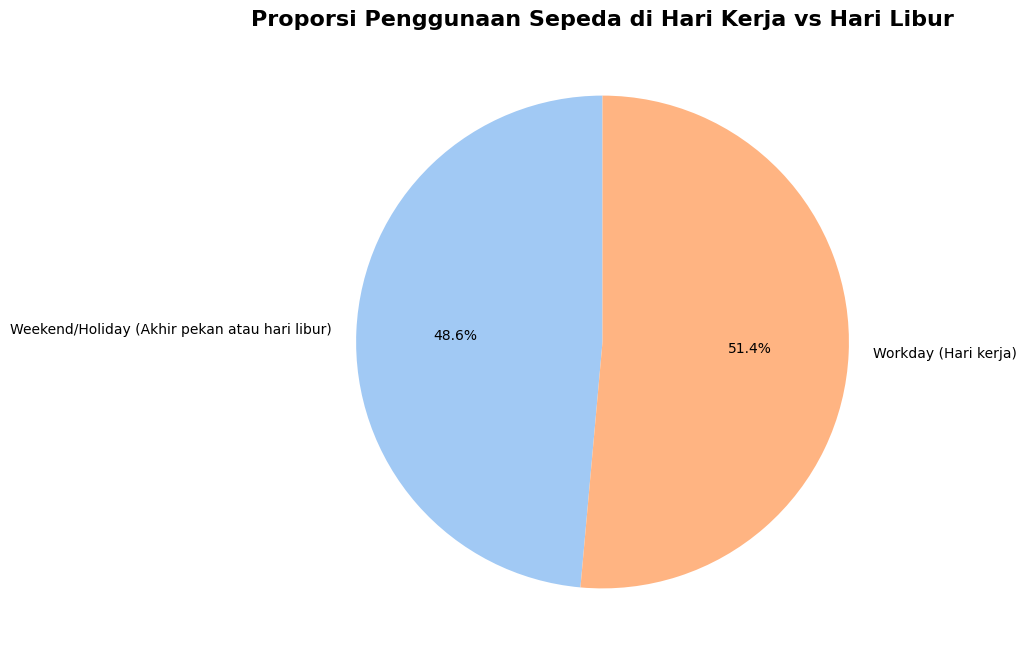

In [116]:
# Menghitung rata-rata jumlah peminjaman sepeda berdasarkan hari kerja dan hari libur
workingday_usage = day_data.groupby('is_working_day')['total_rentals'].mean().reset_index()

# Menyesuaikan label
workingday_usage['is_working_day'] = workingday_usage['is_working_day'].replace({
    'Workday': 'Hari Kerja',
    'Weekend/Holiday': 'Hari Libur'
})

# Pie chart untuk membandingkan penggunaan sepeda di hari kerja dan libur
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:2]
plt.pie(workingday_usage['total_rentals'], labels=workingday_usage['is_working_day'], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Proporsi Penggunaan Sepeda di Hari Kerja vs Hari Libur", fontsize=16, fontweight='bold')
plt.show()


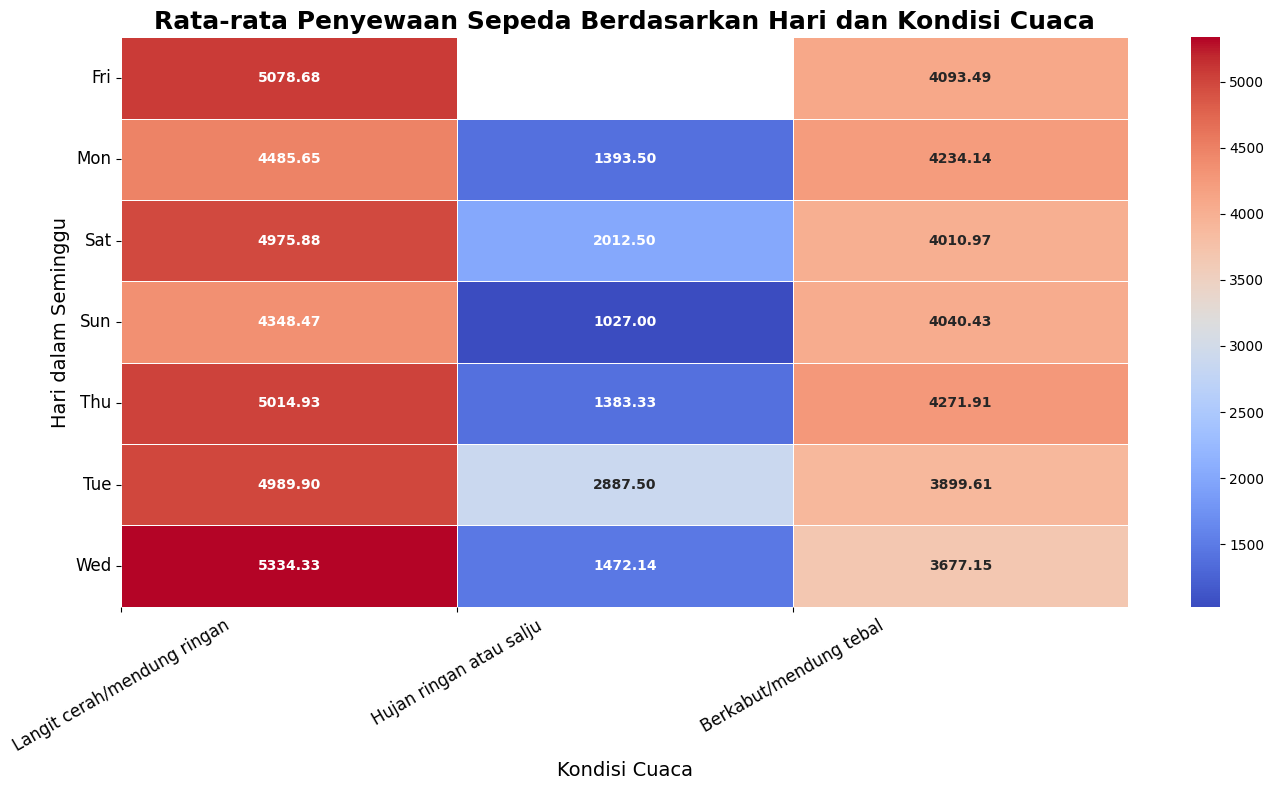

In [133]:
# Membuat pivot table untuk analisis
pivot_data = day_data.pivot_table(
    values='total_rentals',  # Jumlah sepeda yang disewa
    index='week_day',  # Hari dalam seminggu
    columns='weathersit',  # Kondisi cuaca
    aggfunc='mean'  # Rata-rata jumlah penyewaan sepeda
)

# Visualisasi heatmap dengan label yang sesuai
plt.figure(figsize=(14, 8))
sns.heatmap(
    pivot_data,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    cbar=True,
    annot_kws={"size": 10, "weight": "bold"},
)

# Menambahkan judul dan label
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Hari dan Kondisi Cuaca", fontsize=18, fontweight='bold')
plt.xlabel("Kondisi Cuaca", fontsize=14)
plt.ylabel("Hari dalam Seminggu", fontsize=14)

# Label untuk kondisi cuaca (weathersit)
updated_labels = [
    'Langit cerah/mendung ringan',  # Pastikan label ini sesuai dengan data Anda
    'Hujan ringan atau salju',
    'Berkabut/mendung tebal'
]

plt.xticks(
    ticks=range(len(pivot_data.columns)),
    labels=updated_labels,
    rotation=30,
    fontsize=12,
)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()


**Insight:**


- Pengaruh Cuaca terhadap Penggunaan Sepeda: Visualisasi menunjukkan bahwa kondisi cuaca memiliki pengaruh signifikan terhadap jumlah peminjaman sepeda. Pada cuaca cerah, penggunaan sepeda cenderung lebih tinggi dibandingkan dengan cuaca berawan atau hujan. Hal ini mengindikasikan bahwa cuaca yang lebih baik mendukung orang untuk memilih sepeda sebagai moda transportasi atau rekreasi.

- Penggunaan Sepeda di Hari Kerja vs Akhir Pekan: Meskipun ada perbedaan yang cukup tipis, lebih banyak pengguna sepeda yang memilih menggunakannya pada hari kerja dibandingkan pada akhir pekan atau hari libur. Hal ini menunjukkan bahwa sepeda lebih sering digunakan untuk keperluan sehari-hari seperti transportasi dibandingkan untuk aktivitas rekreasi. Data ini bisa membantu dalam merencanakan ketersediaan sepeda di waktu tertentu.

- Korelasi antara Rata-rata Pengguna dan Jumlah Peminjaman Sepeda: Visualisasi yang menunjukkan rata-rata jumlah peminjaman sepeda dan pengguna sepeda berdasarkan hari dan cuaca mengungkapkan pola yang tidak selalu langsung berhubungan. Meskipun ada jumlah peminjaman yang tinggi pada hari kerja, jumlah pengguna sepeda secara keseluruhan tidak berbeda jauh antara hari kerja dan akhir pekan. Hal ini menunjukkan bahwa meskipun penggunaan sepeda untuk pekerjaan lebih dominan, aktivitas rekreasi juga tetap signifikan, sehingga perlu adanya strategi yang seimbang dalam pengelolaan sistem peminjaman sepeda.

## Conclution

- Conclution pertanyaan 1:
Kondisi Cuaca: Cuaca cerah dan berawan ringan adalah waktu paling populer untuk penyewaan sepeda.

- Conclution pertanyaan 2:
Hari Kerja vs. Akhir Pekan: Hari kerja menunjukkan jumlah penyewaan yang lebih tinggi dibandingkan akhir pekan, menunjukkan bahwa sepeda digunakan lebih sering untuk keperluan kerja.




In [144]:
# Save the cleaned dataset to a CSV file
output_path = 'day_cleaned.csv'
day_data.to_csv(output_path, index=False)

# Notify the user
print(f"Dataset cleaned and saved as {output_path}")

Dataset cleaned and saved as day_cleaned.csv


In [145]:
# Save the cleaned dataset to a CSV file
output_path = 'hour_cleaned.csv'
hour_data.to_csv(output_path, index=False)

# Notify the user
print(f"Dataset cleaned and saved as {output_path}")

Dataset cleaned and saved as hour_cleaned.csv
